# این جواب قسمت های یک تا سه است 

In [50]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Load data from the CSV file

In [51]:

file_path = "sonar.csv"
df = pd.read_csv(file_path, header=None)

# Separate features and labels

In [52]:


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert labels to numerical values


In [53]:


label_mapping = {'R': 0, 'M': 1}
y_numeric = y.map(label_mapping)

# Split the data into training and testing sets

In [54]:

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)



# Normalize the data

In [55]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP model

In [56]:

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Initialize the model

In [57]:

input_size = X_train.shape[1]
hidden_size = 30
output_size = 2  # Number of classes
model = MLP(input_size, hidden_size, output_size)

# Define loss function and optimizer

In [58]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training the model

In [59]:
# Lists to store training and testing losses and accuracies
train_losses = []
test_losses = []
accuracies = []

# Training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.tensor(X_train_scaled, dtype=torch.float32))
    loss = criterion(outputs, torch.tensor(y_train.values, dtype=torch.long))
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        test_outputs = model(torch.tensor(X_test_scaled, dtype=torch.float32))
        test_loss = criterion(test_outputs, torch.tensor(y_test.values, dtype=torch.long))

    # Append losses to the lists
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    # Calculate accuracy and append to the list
    predictions = torch.argmax(model(torch.tensor(X_test_scaled, dtype=torch.float32)), dim=1)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}, Test Loss: {test_loss.item()}, Accuracy: {accuracy}')

Epoch [1/100], Loss: 0.702794075012207, Test Loss: 0.7054328322410583, Accuracy: 0.5
Epoch [2/100], Loss: 0.7023784518241882, Test Loss: 0.7048242688179016, Accuracy: 0.5
Epoch [3/100], Loss: 0.7019648551940918, Test Loss: 0.7042155861854553, Accuracy: 0.5
Epoch [4/100], Loss: 0.7015544176101685, Test Loss: 0.7036088705062866, Accuracy: 0.5
Epoch [5/100], Loss: 0.7011450529098511, Test Loss: 0.7030051946640015, Accuracy: 0.5
Epoch [6/100], Loss: 0.7007371187210083, Test Loss: 0.7024038434028625, Accuracy: 0.5
Epoch [7/100], Loss: 0.7003301978111267, Test Loss: 0.7018046975135803, Accuracy: 0.5
Epoch [8/100], Loss: 0.6999244689941406, Test Loss: 0.7012081742286682, Accuracy: 0.5
Epoch [9/100], Loss: 0.6995201706886292, Test Loss: 0.7006142139434814, Accuracy: 0.5238095238095238
Epoch [10/100], Loss: 0.6991174817085266, Test Loss: 0.7000249028205872, Accuracy: 0.5238095238095238
Epoch [11/100], Loss: 0.698716938495636, Test Loss: 0.6994372606277466, Accuracy: 0.5238095238095238
Epoch [12


# Evaluate the model

In [60]:
with torch.no_grad():
    predictions = torch.argmax(model(torch.tensor(X_test_scaled, dtype=torch.float32)), dim=1)
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')

Accuracy: 0.7142857142857143
Confusion Matrix:
[[ 7  9]
 [ 3 23]]


# Plotting the training and testing losses

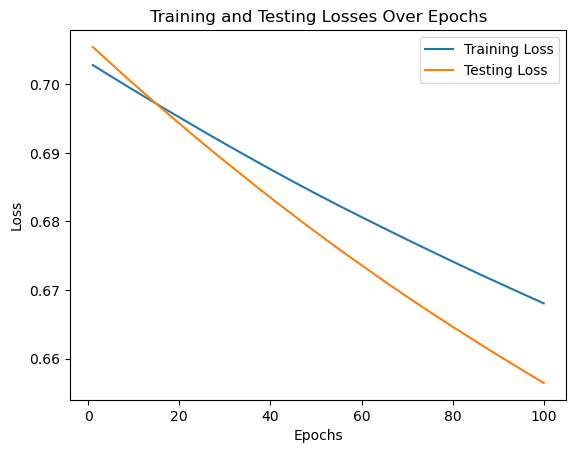

In [61]:


plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Testing Loss')
plt.title('Training and Testing Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



# Plotting the accuracy

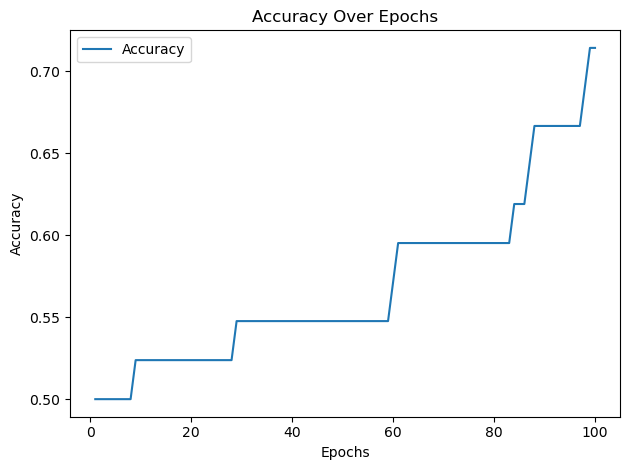

In [62]:


plt.plot(range(1, epochs + 1), accuracies, label='Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
